# Using KNN classification algorithm, predicting Malignant OR Benign prostate cancer.

The data set contains patients who have been diagnosed with either Malignant (M) or Benign (B) cancer.

In [1]:
# Loading the packages we need.
library(ggplot2)
library(class)
library(gmodels)

In [2]:
# Load the data and check its characteristics..

prc <- read.csv("Prostate_Cancer.csv",stringsAsFactors = FALSE)
summary(prc)

       id         diagnosis_result       radius         texture     
 Min.   :  1.00   Length:100         Min.   : 9.00   Min.   :11.00  
 1st Qu.: 25.75   Class :character   1st Qu.:12.00   1st Qu.:14.00  
 Median : 50.50   Mode  :character   Median :17.00   Median :17.50  
 Mean   : 50.50                      Mean   :16.85   Mean   :18.23  
 3rd Qu.: 75.25                      3rd Qu.:21.00   3rd Qu.:22.25  
 Max.   :100.00                      Max.   :25.00   Max.   :27.00  
   perimeter           area          smoothness      compactness    
 Min.   : 52.00   Min.   : 202.0   Min.   :0.0700   Min.   :0.0380  
 1st Qu.: 82.50   1st Qu.: 476.8   1st Qu.:0.0935   1st Qu.:0.0805  
 Median : 94.00   Median : 644.0   Median :0.1020   Median :0.1185  
 Mean   : 96.78   Mean   : 702.9   Mean   :0.1027   Mean   :0.1267  
 3rd Qu.:114.25   3rd Qu.: 917.0   3rd Qu.:0.1120   3rd Qu.:0.1570  
 Max.   :172.00   Max.   :1878.0   Max.   :0.1430   Max.   :0.3450  
    symmetry      fractal_dimensio

Remove 'id' from data set because its not needed to build this model.

In [3]:
prc <- prc[-1]

In [4]:
sum(is.na(prc))

[1] 0

Checked for missing values
Good news! No NAs.

Since our dependent variable "diagnosis_result" is M or B, I want to make it into a descriptive form, adding another column "diagnosis". 

Then, normalize data and divide it into Training and Testing Sets randomly, I used 65:35 ratio.

In [5]:
prc$diagnosis <- factor(prc$diagnosis_result, levels = c("B", "M"), labels = c("Benign", "Malignant"))

#Normalize the numeric variables in data
normalize <- function(x) {
               return ((x - min(x)) / (max(x) - min(x))) }

prc_normalized <- as.data.frame(lapply(prc[2:9], normalize))
prc_normalized <- cbind(prc$diagnosis, prc_normalized)

#Divide data in train & test set
train_index <- sample(1:nrow(prc_normalized), 0.65 * nrow(prc_normalized))
prc_train <- prc_normalized [train_index,]
prc_test <- prc_normalized [-train_index,]

#Extract prediction class labels of train and test set.
train_label <- prc_train[,1]
test_label <- prc_test[,1]


Apply KNN classification algorithm multiple times to measure accuracy of Model with multiple values of k.
Classification of the K Nearest Neighbors, i.e. the k number of cases that are considered to be "nearest" when you convert the cases as points in a euclidean space.

Record accuracy for each value of K.

In this case I preferred k = 3 to 12. Generally k is around square root of number of observations [but that's not a rule].


In [6]:

result<- data.frame()
for (i in 3:12)
{
    prc_pred <- knn(train = prc_train [,-1], test = prc_test [,-1], cl = train_label, k = i)
    confusion_matrix <- table(test_label, prc_pred)
    accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
    
    result <- rbind( result, c(i, accuracy))

}
names(result) <- c("k", "accuracy")



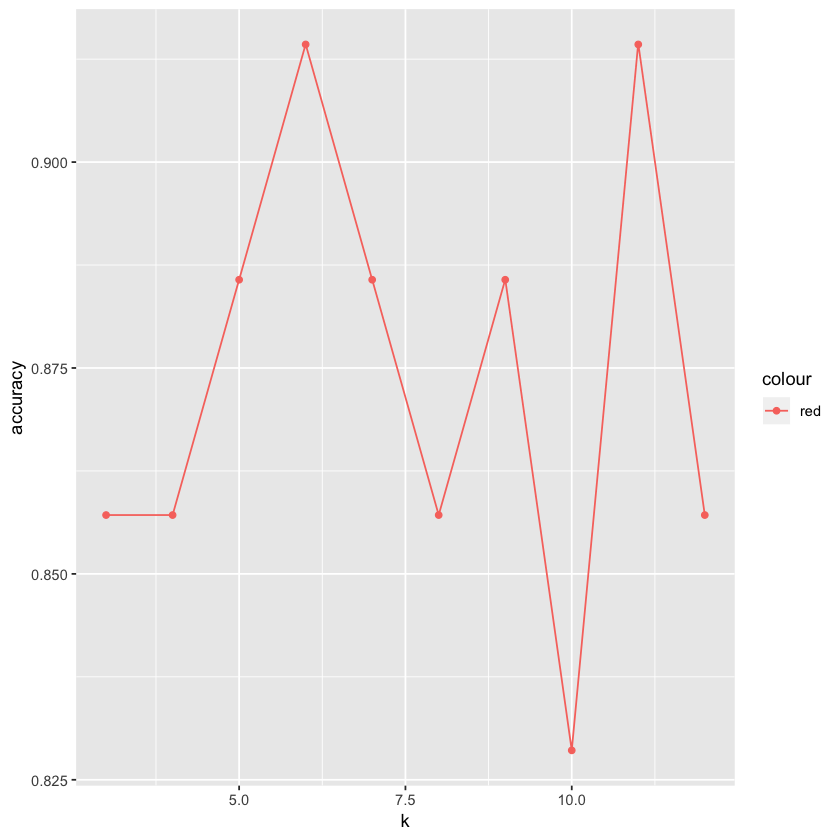

In [7]:
# optimum k with highest accuracy
ggplot(data=result, aes(x=k, y=accuracy, col='red'))+geom_point() + geom_line()
final_k <- result[which.max(result$accuracy),"k"]


Creating a confusion matrix with optimum k.

And evaluate the model performance.

In [8]:
final_model<- knn(train = prc_train [,-1], test = prc_test [,-1], cl = train_label, k = final_k)
final_cm<-CrossTable(x=test_label, y=final_model, prop.chisq=FALSE)



 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  35 

 
             | final_model 
  test_label |    Benign | Malignant | Row Total | 
-------------|-----------|-----------|-----------|
      Benign |         9 |         3 |        12 | 
             |     0.750 |     0.250 |     0.343 | 
             |     0.818 |     0.125 |           | 
             |     0.257 |     0.086 |           | 
-------------|-----------|-----------|-----------|
   Malignant |         2 |        21 |        23 | 
             |     0.087 |     0.913 |     0.657 | 
             |     0.182 |     0.875 |           | 
             |     0.057 |     0.600 |           | 
-------------|-----------|-----------|-----------|
Column Total |        11 |        24 |        35 | 
             |     0.314 |     0.686 |           | 
-------------|-----

In [9]:
#Accuracy of our model rounding it to 2 decimal places.
#Accuracy = ( TP + TN ) / Total observations tested
final_accuracy <- round(sum(diag(final_cm$t)) *100 /sum(final_cm$t) ,2)

In [10]:
# Our model is quite accurate
final_cm$t

paste('Accuracy =', final_accuracy, '%', sep=' ')

           y
x           Benign Malignant
  Benign         9         3
  Malignant      2        21

[1] "Accuracy = 85.71 %"

CONCLUSION:

The Accuracy of our KNN model is quite high at 85.71%.
In the confusion matrix x indicates actual and y indicates predictd.
The first row & first column of the confusion matrix indicates the number of cases predicted accurately (True Negatives) as Benign (B).
The first row & first column indicates True Positives cases predicted as Malignant (M).

There were 2 Malignant cases that were predicted Benign (False Negative).


There were 3 Benign cases that were predicted Malignant (False Positive)





In [11]:
final_k

[1] 6